# 5. Convolutional Neural Networks (CNN)

1. Experimento 1

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

from minisom import MiniSom
import copy

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
# Cargar el dataset CIFAR-10
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar los datos
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Codificar las etiquetas en formato one-hot
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
# Just to have short codes
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

# Building and training a model
# Implementación de la arquitectura del modelo
model = tf.keras.Sequential()

# Capa convolucional con 32 filtros, tamaño de kernel 3x3 y función de activación ReLU
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Capa de MaxPooling con tamaño de ventana 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de Flatten para convertir las características convolucionales en un vector unidimensional
model.add(Flatten())

# Capa densa con 128 unidades y función de activación ReLU
model.add(Dense(128, activation='relu'))

# Capa densa de salida con 10 unidades y función de activación Softmax para la clasificación multiclase
model.add(Dense(num_classes, activation='softmax'))

# Compilación del modelo
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

/Users/danny/Documents/ITESM/8vo Semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Inteligencia Artificial/Actividad M2.5/M2.5env3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Entrenamiento del modelo
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    verbose=1)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3576 - loss: 1.8143 - val_accuracy: 0.5343 - val_loss: 1.3317
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5427 - loss: 1.2932 - val_accuracy: 0.5743 - val_loss: 1.2224
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5936 - loss: 1.1600 - val_accuracy: 0.5766 - val_loss: 1.2114
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6262 - loss: 1.0741 - val_accuracy: 0.6205 - val_loss: 1.1057
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6520 - loss: 1.0028 - val_accuracy: 0.6334 - val_loss: 1.0615
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6749 - loss: 0.9426 - val_accuracy: 0.6383 - val_loss: 1.0436
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6864 - loss: 0.8984 - val_accuracy: 0.6307 - val_loss: 1.0533
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7010 - loss: 0.8654 - val_ac

{'verbose': 1, 'epochs': 20, 'steps': 782}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


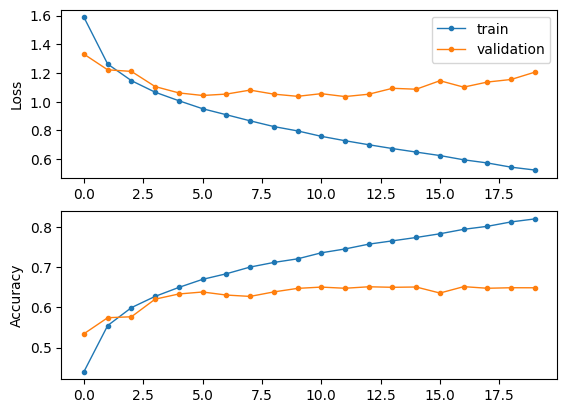

In [7]:
# Show history
print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1)
axs[0].plot(history.history['loss'], marker= '.', linewidth = 1)
axs[0].plot(history.history['val_loss'], marker= '.', linewidth = 1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker= '.', linewidth = 1)
axs[1].plot(history.history['val_accuracy'], marker= '.', linewidth = 1)
axs[1].set_ylabel(r"Accuracy")
axs[0].legend(["train", "validation"], loc = "upper right")
plt.show()

In [8]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2061717510223389
Test accuracy: 0.6488000154495239


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[3 8 0 0 6 6 1 6 3 1]


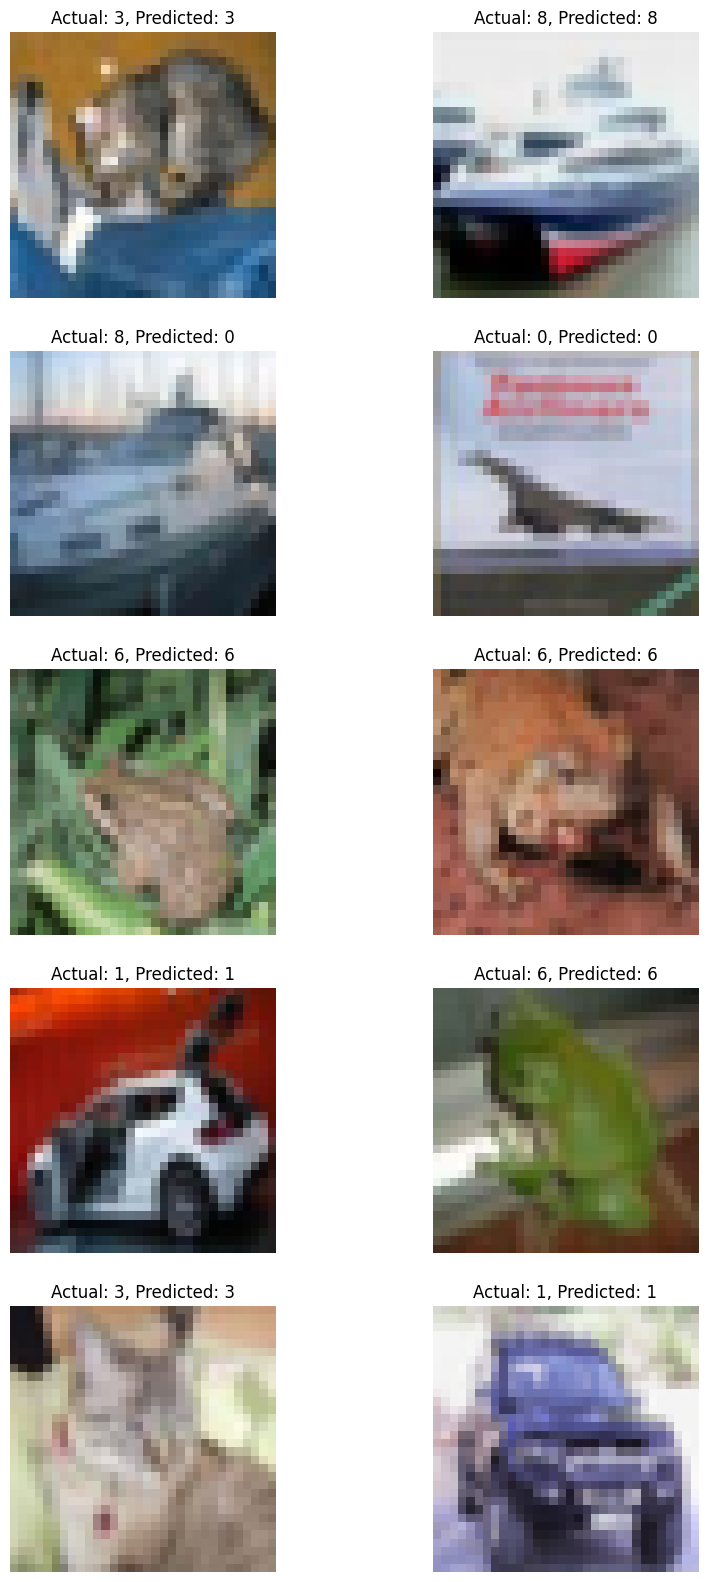

In [9]:
# Obtener una muestra de imágenes de prueba de CIFAR-10
num_samples = 10
sample_test_images = x_test[:num_samples]
ground_truth_labels = y_test[:num_samples]

# Use it to predict classes
y_pred = model.predict(sample_test_images)
pred_idx = tf.math.argmax(y_pred, axis=-1).numpy()
print(pred_idx)

# Print images and resulting classes
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()
actual = []
predicted = []
for img, lbl, pred_id, ax in zip(sample_test_images, ground_truth_labels, pred_idx, axes):
    ax.imshow(img)
    label_num = np.argmax(lbl)
    actual.append(label_num)
    predicted.append(pred_id)
    label = "Actual: {}, Predicted: {}".format(label_num, pred_id)
    ax.set_title(label)
    ax.axis('off')
plt.show()

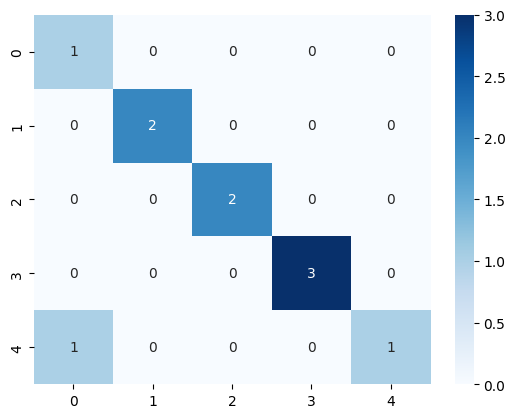

In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(actual, predicted)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.show()

2. Experimento 2

In [11]:
# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar los datos
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Codificar las etiquetas en formato one-hot
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [12]:
# Implementación de la arquitectura del modelo modificado
model = Sequential()

# Capa convolucional con 32 filtros, tamaño de kernel 3x3 y función de activación ReLU
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))

# Capa convolucional adicional con 64 filtros, tamaño de kernel 3x3 y función de activación ReLU
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Capa de MaxPooling con tamaño de ventana 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa de Dropout con una tasa de 0.25 para reducir el sobreajuste
model.add(Dropout(0.25))

# Capa de Flatten para convertir las características convolucionales en un vector unidimensional
model.add(Flatten())

# Capa densa con 128 unidades y función de activación ReLU
model.add(Dense(128, activation='relu'))

# Capa de Dropout con una tasa de 0.5 para reducir el sobreajuste
model.add(Dropout(0.5))

# Capa densa de salida con 10 unidades y función de activación Softmax para la clasificación multiclase
model.add(Dense(num_classes, activation='softmax'))

# Compilación del modelo
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

/Users/danny/Documents/ITESM/8vo Semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales/Inteligencia Artificial/Actividad M2.5/M2.5env3.11.9/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Entrenamiento del modelo
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    verbose=1)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.3404 - loss: 1.7997 - val_accuracy: 0.5893 - val_loss: 1.2226
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.5387 - loss: 1.2914 - val_accuracy: 0.6309 - val_loss: 1.0579
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.6006 - loss: 1.1412 - val_accuracy: 0.6600 - val_loss: 0.9857
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.6313 - loss: 1.0398 - val_accuracy: 0.6697 - val_loss: 0.9535
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.6527 - loss: 0.9818 - val_accuracy: 0.6767 - val_loss: 0.9292
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.6738 - loss: 0.9218 - val_accuracy: 0.6927 - val_loss: 0.8843
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.6933 - loss: 0.8662 - val_accuracy: 0.6855 - val_loss: 0.9187
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.7062 - loss: 0.8268 - 

{'verbose': 1, 'epochs': 20, 'steps': 782}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


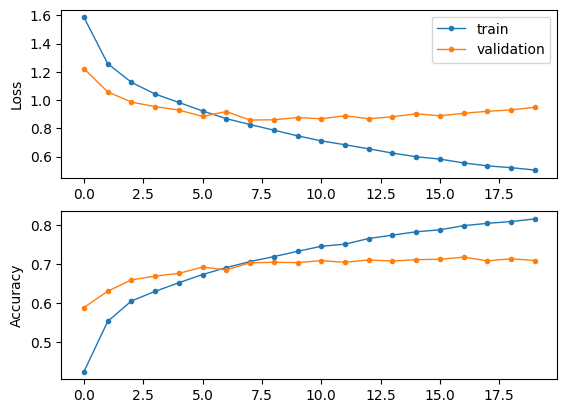

In [14]:
# Show history
print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1)
axs[0].plot(history.history['loss'], marker= '.', linewidth = 1)
axs[0].plot(history.history['val_loss'], marker= '.', linewidth = 1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker= '.', linewidth = 1)
axs[1].plot(history.history['val_accuracy'], marker= '.', linewidth = 1)
axs[1].set_ylabel(r"Accuracy")
axs[0].legend(["train", "validation"], loc = "upper right")
plt.show()

In [15]:
# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9484936594963074
Test accuracy: 0.7095000147819519


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[3 8 8 0 6 6 1 6 3 1]


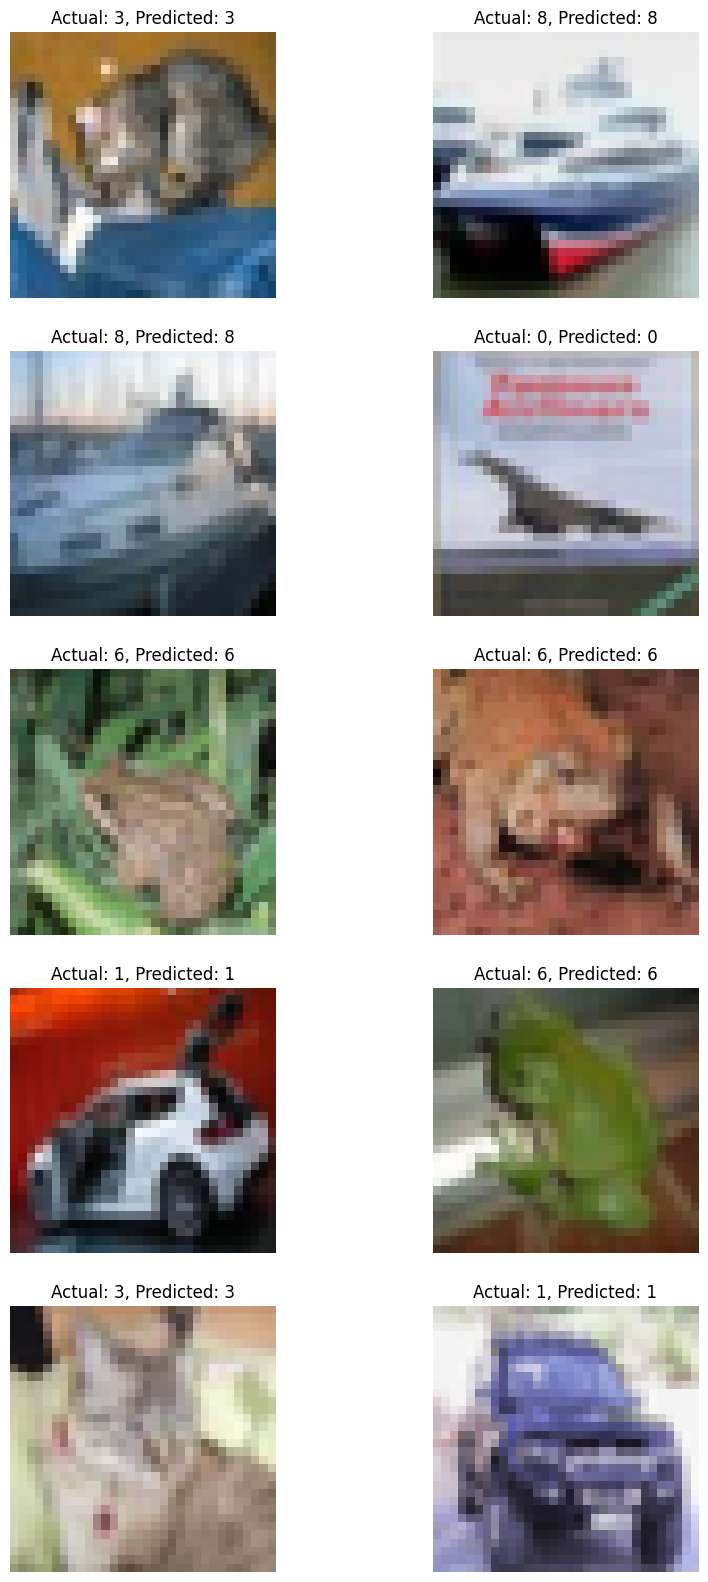

In [16]:
# Obtener una muestra de imágenes de prueba de CIFAR-10
num_samples = 10
sample_test_images = x_test[:num_samples]
ground_truth_labels = y_test[:num_samples]

# Use it to predict classes
y_pred = model.predict(sample_test_images)
pred_idx = tf.math.argmax(y_pred, axis=-1).numpy()
print(pred_idx)

# Print images and resulting classes
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()
actual = []
predicted = []
for img, lbl, pred_id, ax in zip(sample_test_images, ground_truth_labels, pred_idx, axes):
    ax.imshow(img)
    label_num = np.argmax(lbl)
    actual.append(label_num)
    predicted.append(pred_id)
    label = "Actual: {}, Predicted: {}".format(label_num, pred_id)
    ax.set_title(label)
    ax.axis('off')
plt.show()

3. Experimento 3

In [21]:
import keras_tuner as kt

# Cargar datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

In [22]:
# Función para construir el modelo Keras con hiperparámetros
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(32, 32, 3)
    ))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=Adam(
        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    ),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    
    return model

# Inicializar el tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='intro_to_kt'
)

# Definir la llamada de detención temprana (early stopping)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Realizar la búsqueda de hiperparámetros
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Los mejores hiperparámetros son:
- Número de filtros en la primera capa convolucional: {best_hps.get('conv_1_filter')}
- Tamaño del kernel en la primera capa convolucional: {best_hps.get('conv_1_kernel')}
- Unidades en la capa densa: {best_hps.get('dense_units')}
- Tasa de aprendizaje: {best_hps.get('learning_rate')}
""")

Trial 23 Complete [00h 03m 07s]
val_accuracy: 0.4255000054836273

Best val_accuracy So Far: 0.6377999782562256
Total elapsed time: 00h 54m 03s

Search: Running Trial #24

Value             |Best Value So Far |Hyperparameter
32                |128               |conv_1_filter
3                 |3                 |conv_1_kernel
128               |256               |dense_units
0.01              |0.0001            |learning_rate
7                 |20                |tuner/epochs
0                 |7                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/7
 594/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1011 - loss: 55.0766

KeyboardInterrupt: 

In [ ]:
# Construir el modelo con los mejores hiperparámetros
model = tuner.hypermodel.build(best_hps)

In [ ]:
# Entrenar el modelo con los mejores hiperparámetros
history = model.fit(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

In [ ]:
# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=0)
print("Precisión en el conjunto de validación:", val_accuracy)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Precisión en el conjunto de prueba:", test_accuracy)

In [ ]:
# Show history
print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1)
axs[0].plot(history.history['loss'], marker= '.', linewidth = 1)
axs[0].plot(history.history['val_loss'], marker= '.', linewidth = 1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker= '.', linewidth = 1)
axs[1].plot(history.history['val_accuracy'], marker= '.', linewidth = 1)
axs[1].set_ylabel(r"Accuracy")
axs[0].legend(["train", "validation"], loc = "upper right")
plt.show()

In [ ]:
# Evaluación del modelo final en el conjunto de prueba
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Obtener una muestra de imágenes de prueba de CIFAR-10
num_samples = 10
sample_test_images = x_test[:num_samples]
ground_truth_labels = y_test[:num_samples]

# Use it to predict classes
y_pred = model.predict(sample_test_images)
pred_idx = tf.math.argmax(y_pred, axis=-1).numpy()
print(pred_idx)

# Print images and resulting classes
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()
actual = []
predicted = []
for img, lbl, pred_id, ax in zip(sample_test_images, ground_truth_labels, pred_idx, axes):
    ax.imshow(img)
    label_num = np.argmax(lbl)
    actual.append(label_num)
    predicted.append(pred_id)
    label = "Actual: {}, Predicted: {}".format(label_num, pred_id)
    ax.set_title(label)
    ax.axis('off')
plt.show()

4. Experimento 4

In [ ]:
# Cargar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizar los datos
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Codificar las etiquetas en formato one-hot
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# Aplicar aumento de datos
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Cargar el modelo pre-entrenado VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Congelar las capas del modelo pre-entrenado
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Añadir capas adicionales encima del modelo pre-entrenado
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compilación del modelo
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
# Entrenamiento del modelo con aumento de datos
batch_size = 64
epochs = 20
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
          steps_per_epoch=len(x_train) // batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          verbose=1)

In [ ]:
# Show history
print(history.params)
print(history.history.keys())

_, axs = plt.subplots(2, 1)
axs[0].plot(history.history['loss'], marker= '.', linewidth = 1)
axs[0].plot(history.history['val_loss'], marker= '.', linewidth = 1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['accuracy'], marker= '.', linewidth = 1)
axs[1].plot(history.history['val_accuracy'], marker= '.', linewidth = 1)
axs[1].set_ylabel(r"Accuracy")
axs[0].legend(["train", "validation"], loc = "upper right")
plt.show()

In [ ]:
# Evaluación del modelo en el conjunto de prueba
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Obtener una muestra de imágenes de prueba de CIFAR-10
num_samples = 10
sample_test_images = x_test[:num_samples]
ground_truth_labels = y_test[:num_samples]

# Use it to predict classes
y_pred = model.predict(sample_test_images)
pred_idx = tf.math.argmax(y_pred, axis=-1).numpy()
print(pred_idx)

# Print images and resulting classes
fig, axes = plt.subplots(5, 2, figsize=(10, 20))
axes = axes.flatten()
actual = []
predicted = []
for img, lbl, pred_id, ax in zip(sample_test_images, ground_truth_labels, pred_idx, axes):
    ax.imshow(img)
    label_num = np.argmax(lbl)
    actual.append(label_num)
    predicted.append(pred_id)
    label = "Actual: {}, Predicted: {}".format(label_num, pred_id)
    ax.set_title(label)
    ax.axis('off')
plt.show()